In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import math

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("../"))
from sandbox.world import World 

### Conceptual Recap
To use the new dynamics set *behavior* parameter to "orbit."
**model_var** takes inputs between 0 and 1 (exclusive) in order to generate eigenvalues.
**behav_model** is a matrix that gets intialized by a (currently random change of basis matrix) and the eigenvalues.

At each time step, error from the last "interaction" is used to exponentiate the unnormalized behavioral model. Priors are multiplied by this matrix and to yield the new priors. Before they are sent out as behaviors, they pass through a sigmoid function to keep values between 1 and 0.



In [134]:
# don't have to include model_var
world = World(state_size=2, time =4000, agent=["base", "base"], seed=9, model_var = [0.2, 0.7],pred_a = [0.35,0.35], behav_a=[0.1,0.1], prediction=["sigmoid", "sigmoid"], behavior=["orbit", "orbit"], attention=["static", "static"])

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
behaviors = world.get_behaviors()
concurrence = world.get_concurrence()

#world.print_results()
time = [t for t in range(len(costs[0]))]

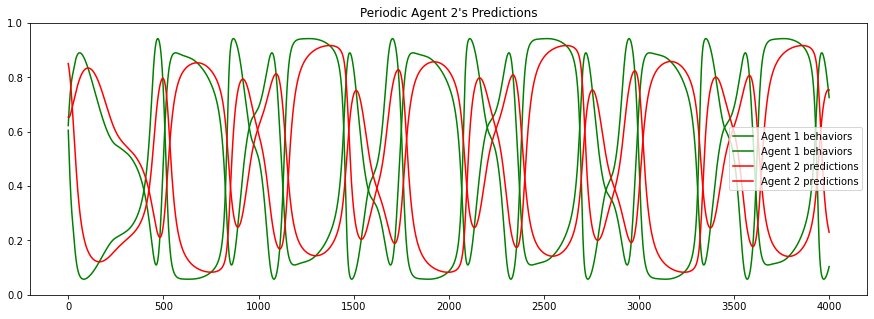

In [135]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, behaviors[0], 'g', label="Agent 1 behaviors")
plt.plot(time, preds[1], 'r', label="Agent 2 predictions")
plt.title("Periodic Agent 2's Predictions")
plt.legend()
plt.ylim([0, 1])
plt.show()

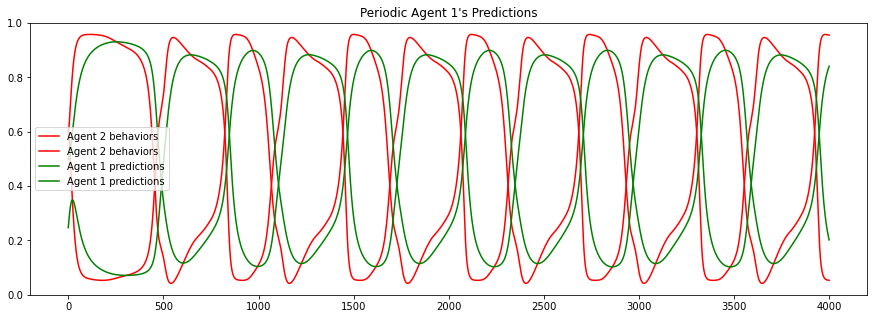

In [136]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, behaviors[1], 'r', label="Agent 2 behaviors")
plt.plot(time, preds[0], 'g', label="Agent 1 predictions")
plt.title("Periodic Agent 1's Predictions")
plt.legend()
plt.ylim([0, 1])
plt.show()

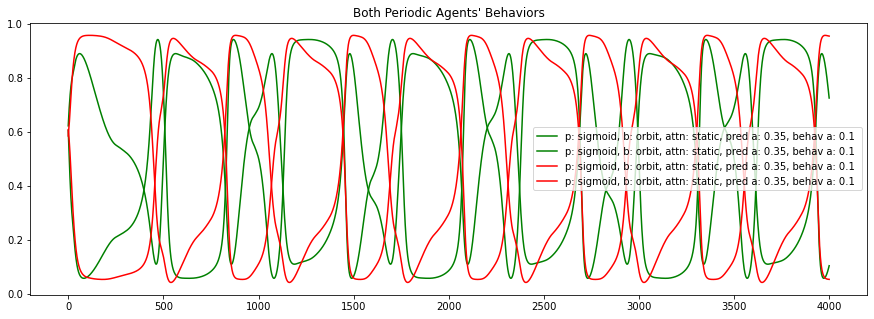

In [137]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, behaviors[0], 'g', label=agents[0])
plt.plot(time, behaviors[1], 'r', label=agents[1])
plt.title("Both Periodic Agents' Behaviors")
plt.legend()
plt.show()

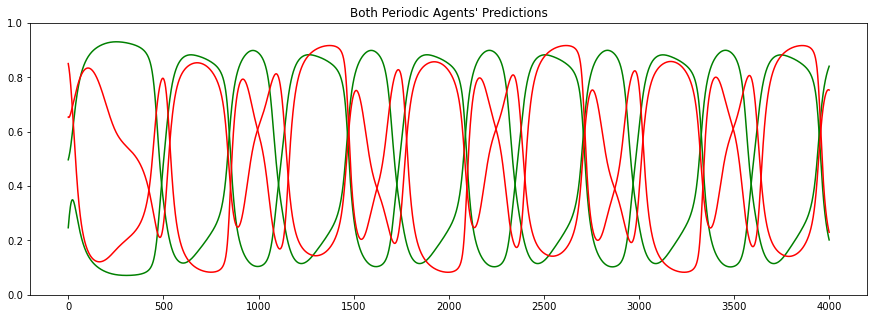

In [138]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, preds[0], 'g', label=agents[0])
plt.plot(time, preds[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.title("Both Periodic Agents' Predictions")
plt.show()

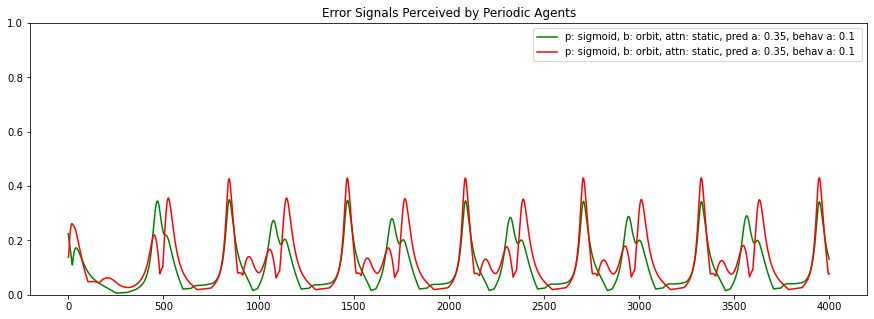

In [139]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error Signals Perceived by Periodic Agents")
plt.show()

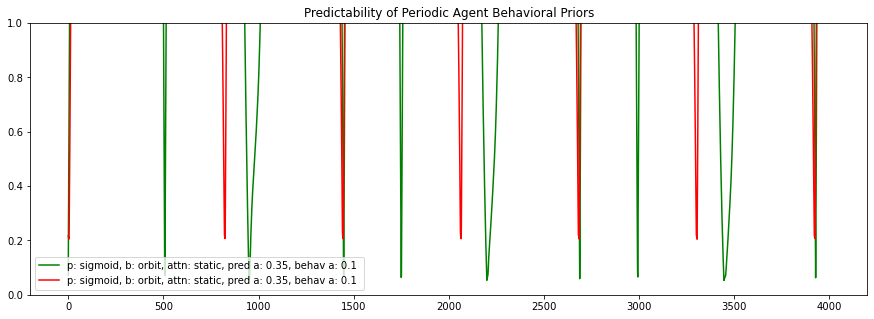

In [140]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Predictability of Periodic Agent Behavioral Priors")
plt.show()

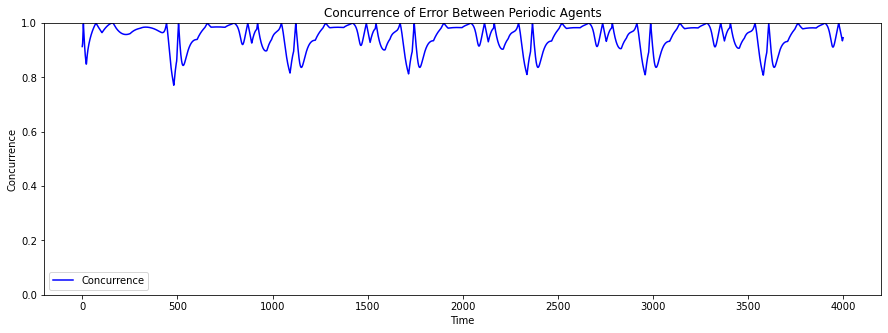

In [141]:
plt.figure(facecolor='white', figsize=(15, 5)) 
plt.plot(time, concurrence[0], 'b', label="Concurrence")
plt.ylim([0, 1])
plt.ylabel("Concurrence")
plt.xlabel("Time")
plt.legend()
plt.title("Concurrence of Error Between Periodic Agents")
plt.show()

### What if predictions update slower than behavior updates?

In [9]:
# don't have to include model_var
world = World(state_size=2, time =300, agent=["base", "base"], seed=9, model_var = [0.2, 0.7],pred_a = [0.7,0.7], behav_a = [0.99, 0.99], prediction=["sigmoid", "sigmoid"], behavior=["orbit", "orbit"], attention=["static", "static"])

world.create_agents()
world.run()
agents = world.get_agents()
error = world.get_avg_abs_error()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()
behaviors = world.get_behaviors()

#world.print_results()
time = [t for t in range(len(costs[0]))]

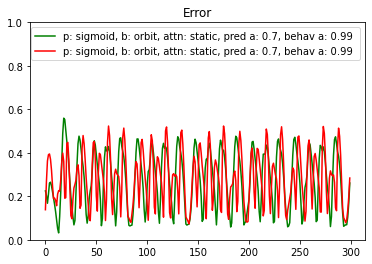

In [10]:
plt.figure(facecolor='white') 
plt.plot(time, error[0], 'g', label=agents[0])
plt.plot(time, error[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Error")
plt.show()